Import the nesesarry libaries and funciton

In [67]:
from datasets import load_dataset
from datasets import Dataset
import pandas as pd
from itables import show
from IPython.display import display
from PIL import Image as PILImage

Download the data

In [2]:
dataset_name = "DamianBoborzi/car_images"
print("\n START DOWNLOAD \n")
try:
    dataset = load_dataset(dataset_name)

    # Zeige die Struktur des Datensatzes an
    print("Datensatz erfolgreich geladen! \n")
except Exception as e:
    print(f"Fehler beim Laden des Datensatzes: {e}")


 START DOWNLOAD 



Loading dataset shards:   0%|          | 0/31 [00:00<?, ?it/s]

Datensatz erfolgreich geladen! 



Show the data

In [87]:
ds_part = dataset["train"].select(range(50))
df_part = ds_part.to_pandas()
df_part = df_part.iloc[:, 1:] # Image als String ausblenden
df_part['id'] = df_part.index

show(df_part)

Loading ITables v2.5.2 from the internet... (need help?)


Show only Meshfleet rows to analyse consistency of ending of file names

In [88]:
df_meshfleet = df_part.loc[df_part.source == 'meshfleet'].iloc[:,1:]
show(df_meshfleet)


Loading ITables v2.5.2 from the internet... (need help?)


Meshfleets IDs are not unique for certain angles, e.g. ending "001" for (2,23), "010" for (0,1), "sideview2" for (11,42) (see below)

For the most the ids endicate the same angle, but not everytime. For the pairs that it's wrong one of the car is 180° rotated

Loading ITables v2.5.2 from the internet... (need help?)


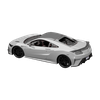

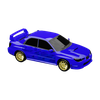

In [89]:
# Change size of picture to see it better in jupyter
FIRST_IMG = 2
SECOND_IMG = 23
IMG_SIZE = (100,100)
IMG_RESAMPLE = PILImage.Resampling.LANCZOS


show(df_part.iloc[[FIRST_IMG,SECOND_IMG]])

display(ds_part[FIRST_IMG]["image"].resize(IMG_SIZE, resample=IMG_RESAMPLE))
display(ds_part[SECOND_IMG]["image"].resize(IMG_SIZE, resample=IMG_RESAMPLE))